<a id="lb"></a>

<div style="background: linear-gradient(to right, #1b5e20, #2e7d32, #388e3c, #43a047, #4caf50); font-family: 'Times New Roman', serif; font-size: 28px; font-weight: bold; text-align: center; border-radius: 15px; padding: 15px; border: 2px solid #ffffff; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.2); -webkit-background-clip: text; -webkit-text-fill-color: transparent;">
    Sentiment Analysis on Social Media using BERT and XAI
</div>

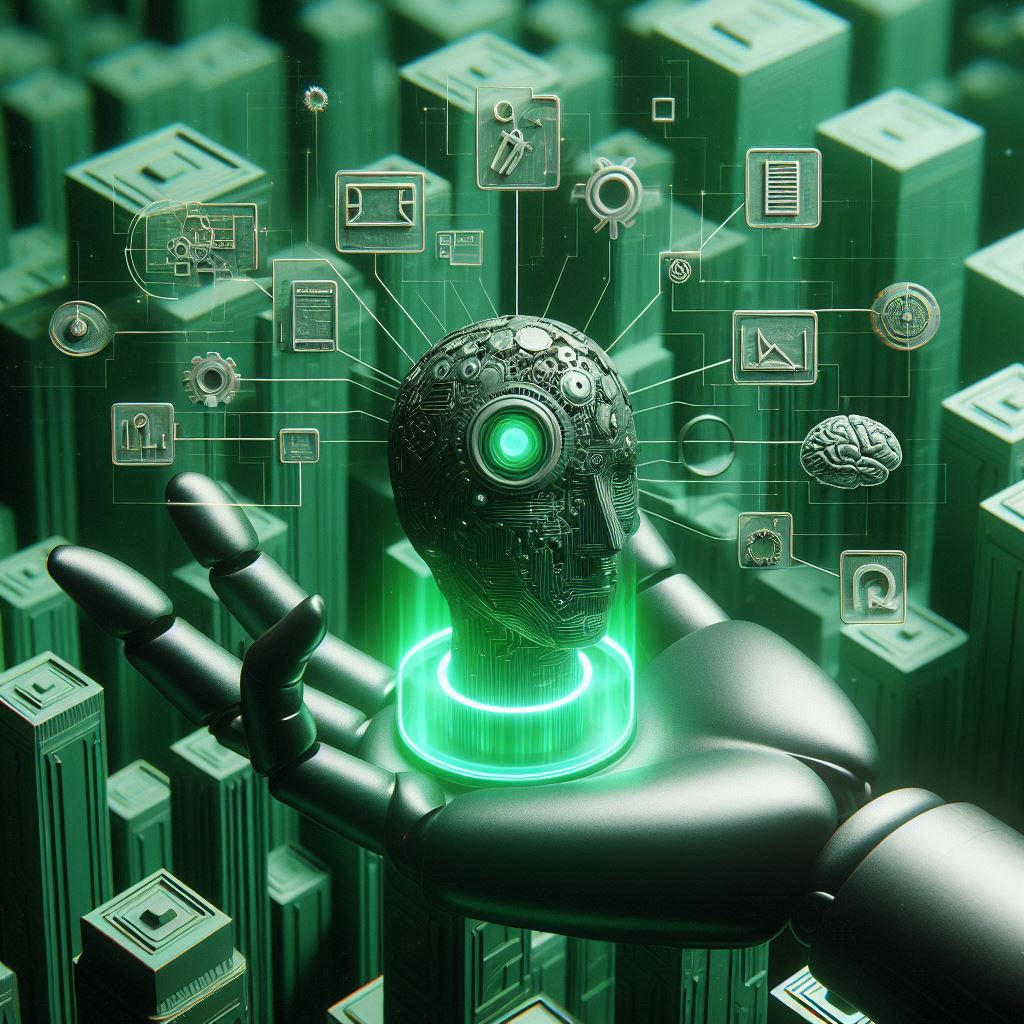
AI Generated XAI

<a id="lb"></a>

# <div style="background-color: #85df6d; font-family: 'Times New Roman', serif; font-size: 36px; color: #ffffff; text-align: center; border-radius: 15px; padding: 15px; border: 2px solid #ffffff; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.2);"><b>Explainable AI</b></div>

Explainable AI (XAI) refers to a set of methodologies, techniques, and tools designed to make the decision-making processes of artificial intelligence (AI) and machine learning (ML) models understandable to humans. As AI systems become increasingly complex and integral to various aspects of society—ranging from healthcare and finance to autonomous vehicles and social media—there's a growing need to ensure that their operations are transparent, trustworthy, and accountable. XAI addresses this need by providing insights into how AI models arrive at their conclusions, enabling users to comprehend, trust, and effectively manage AI-driven outcomes.

<a id="lb"></a>

# <div style="background-color: #85df6d; font-family: 'Times New Roman', serif; font-size: 36px; color: #ffffff; text-align: center; border-radius: 15px; padding: 15px; border: 2px solid #ffffff; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.2);"><b>Introduction</b></div>

Sentiment analysis is a crucial natural language processing (NLP) task that involves determining whether a piece of text expresses a positive, negative, or neutral sentiment. This project leverages BERT-based transformers to perform sentiment analysis on social media posts, specifically tweets. Additionally, Explainable AI (XAI) tools like LIME are utilized to interpret the model's predictions, providing insights into which words or phrases most influence sentiment classification.

<a id="lb"></a>

# <div style="background-color: #85df6d; font-family: 'Times New Roman', serif; font-size: 36px; color: #ffffff; text-align: center; border-radius: 15px; padding: 15px; border: 2px solid #ffffff; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.2);"><b>Import Libraries</b></div>

In [64]:
# General Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Machine Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Transformers and Tokenization
!pip install -q transformers
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments

# Explainable AI Libraries
!pip install -q lime
from lime.lime_text import LimeTextExplainer

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Download NLTK data with checks
import os

nltk_data_path = os.path.join(os.path.expanduser('~'), 'nltk_data')

if not os.path.exists(nltk_data_path):
    os.makedirs(nltk_data_path)

nltk.data.path.append(nltk_data_path)

required_packages = ['stopwords', 'wordnet', 'omw-1.4']

for package in required_packages:
    try:
        nltk.data.find(f'corpora/{package}')
    except LookupError:
        print(f'Downloading NLTK package: {package}')
        nltk.download(package, download_dir=nltk_data_path)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


<a id="lb"></a>

# <div style="background-color: #85df6d; font-family: 'Times New Roman', serif; font-size: 36px; color: #ffffff; text-align: center; border-radius: 15px; padding: 15px; border: 2px solid #ffffff; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.2);"><b>Ensure Proper NLTK Data Download</b></div>

Make sure that the NLTK data packages (wordnet, omw-1.4, and stopwords) are correctly downloaded before any preprocessing steps.

In [65]:
# Import necessary libraries
import nltk

# Download required NLTK data packages
nltk.download('wordnet')
nltk.download('omw-1.4')  # Necessary for WordNet lemmatizer
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<a id="lb"></a>
# <div style="background-color: #85df6d; font-family: 'Times New Roman', serif; font-size: 36px; color: #ffffff; text-align: center; border-radius: 15px; padding: 15px; border: 2px solid #ffffff; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.2);"><b>Verify NLTK Data Path</b></div>

In some environments, especially custom or restricted ones, NLTK might not find the downloaded data. Just specify the download directory and ensure NLTK looks there.

In [66]:
import os

# Define a directory to store NLTK data
nltk_data_dir = os.path.join(os.getcwd(), 'nltk_data')

# Create the directory if it doesn't exist
if not os.path.exists(nltk_data_dir):
    os.makedirs(nltk_data_dir)

# Add the directory to NLTK's data path
nltk.data.path.append(nltk_data_dir)

# Download required NLTK data packages to the specified directory
nltk.download('wordnet', download_dir=nltk_data_dir)
nltk.download('omw-1.4', download_dir=nltk_data_dir)
nltk.download('stopwords', download_dir=nltk_data_dir)

[nltk_data] Downloading package wordnet to
[nltk_data]     /kaggle/working/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /kaggle/working/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /kaggle/working/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

<a id="lb"></a>
# <div style="background-color: #85df6d; font-family: 'Times New Roman', serif; font-size: 36px; color: #ffffff; text-align: center; border-radius: 15px; padding: 15px; border: 2px solid #ffffff; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.2);"><b>Dataset Acquisition and Preprocessing</b></div>

For this project, I'am using the Twitter US Airline Sentiment dataset from Kaggle. This dataset contains tweets about major US airlines, labeled as positive, negative, or neutral.

Note: Ensure you have downloaded the dataset from Kaggle and placed it in the working directory.

In [67]:
# Load the dataset
df = pd.read_csv('/kaggle/input/twitter-airline-sentiment/Tweets.csv')

# Display the first few rows
df.head()

tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnardino                 NaN              0   
2                    NaN  yvonnalynn                 NaN              0   
3                    NaN    jnardino                 NaN              0   
4                    NaN    jnardino                 NaN              0   

                                                text tweet_coord  \
0                @VirginAmerica What @dhepburn said.         NaN   
1  @VirginAmerica plus you've added commercials t...         NaN   
2  @VirginAmerica I didn't today... Must mean I n...         NaN   
3  @VirginAmerica it's really aggressive to blast...         NaN   
4  @VirginAmerica and it's a really big bad thing...         NaN   

               tweet_created tweet_location               user_timezone  
0  2015-02-24 11:35:52 -0800            NaN  Eastern Time (US & Canada)  
1  2015-02-24 11:15:59 -0800            NaN  Pacific Time (US & Canada)  
2  2015-02-24 11:15:48 -0800      Lets Play  Central Time (US & Canada)  
3  2015-02-24 11:15:36 -0800            NaN  Pacific Time (US & Canada)  
4  2015-02-24 11:14:45 -0800            NaN  Pacific Time (US & Canada)

<a id="lb"></a>
# <div style="background-color: #85df6d; font-family: 'Times New Roman', serif; font-size: 36px; color: #ffffff; text-align: center; border-radius: 15px; padding: 15px; border: 2px solid #ffffff; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.2);"><b>Exploratory Data Analysis (EDA)</b></div>

Let's explore the dataset to understand its structure and distribution.

Dataset contains 14640 rows and 15 columns.

Missing values in each column:
tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64


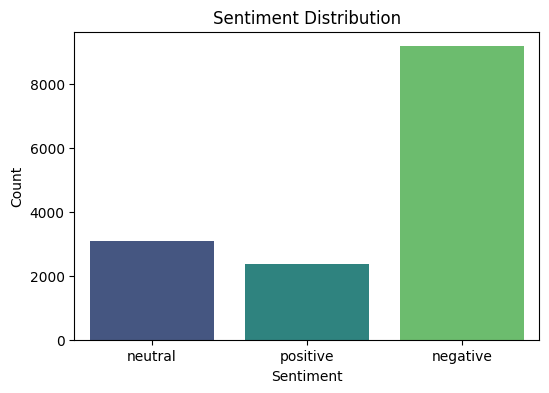

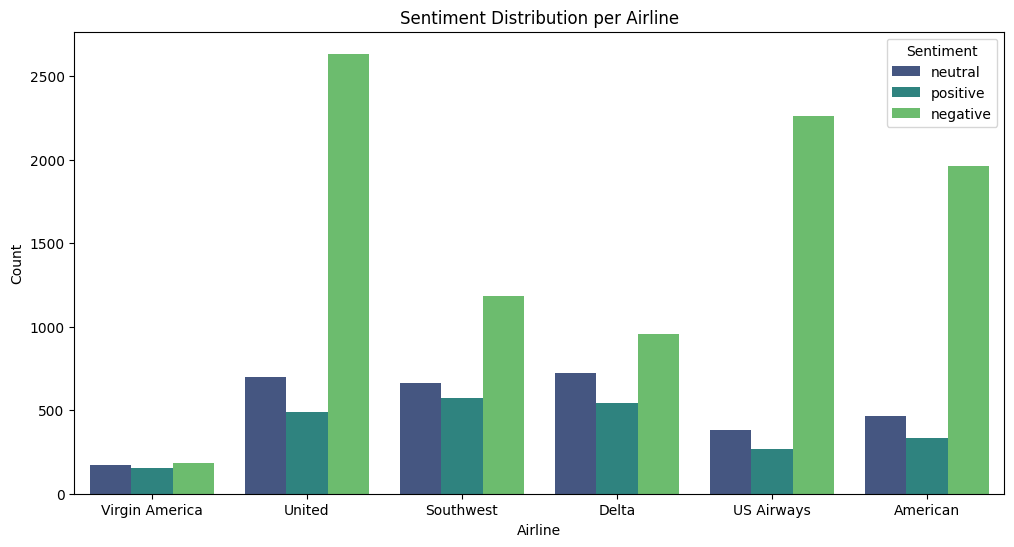

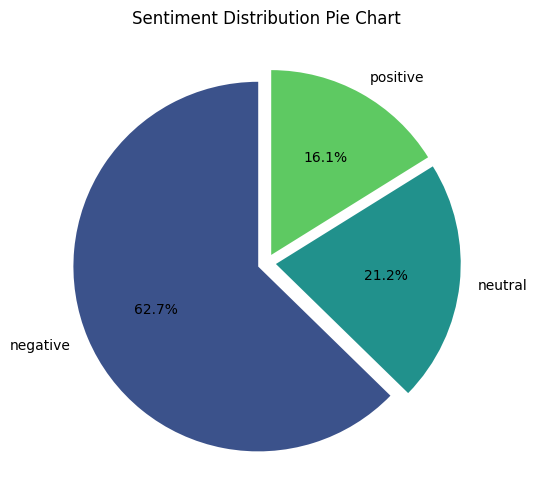

In [68]:
# Check the shape of the dataset
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Distribution of sentiments
plt.figure(figsize=(6,4))
sns.countplot(x='airline_sentiment', data=df, palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Distribution of sentiments per airline
plt.figure(figsize=(12,6))
sns.countplot(x='airline', hue='airline_sentiment', data=df, palette='viridis')
plt.title('Sentiment Distribution per Airline')
plt.xlabel('Airline')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()

# Pie chart for sentiment distribution
plt.figure(figsize=(6,6))
df['airline_sentiment'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('viridis', 3), startangle=90, explode=[0.05]*3)
plt.title('Sentiment Distribution Pie Chart')
plt.ylabel('')  # To remove the y-label
plt.show()

<a id="lb"></a>
# <div style="background-color: #85df6d; font-family: 'Times New Roman', serif; font-size: 36px; color: #ffffff; text-align: center; border-radius: 15px; padding: 15px; border: 2px solid #ffffff; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.2);"><b>Data Preprocessing</b></div>

Preprocessing is crucial for improving the performance of NLP models. We'll clean the text data by removing URLs, mentions, special characters, stopwords, and perform lemmatization.

Note: When using BERT or other transformer-based models, minimal preprocessing is often preferred since these models are designed to handle raw text effectively. However, if you still choose to preprocess, ensure it doesn't remove essential information.

In [69]:
def preprocess_text(text):
    # Check if text is a string
    if not isinstance(text, str):
        return ""
    
    # Lowercase
    text = text.lower()
    
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    # Remove user @ references and '#' from hashtags
    text = re.sub(r'\@\w+|\#','', text)
    
    # Remove special characters, numbers, and punctuations
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\d', ' ', text)
    
    # Remove single characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
    
    # Remove multiple spaces
    text = re.sub(r'\s+', ' ', text)
    
    return text.strip()

# Apply preprocessing
df['clean_text'] = df['text'].apply(preprocess_text)

# Display cleaned text
df[['text', 'clean_text']].head()

text  \
0                @VirginAmerica What @dhepburn said.   
1  @VirginAmerica plus you've added commercials t...   
2  @VirginAmerica I didn't today... Must mean I n...   
3  @VirginAmerica it's really aggressive to blast...   
4  @VirginAmerica and it's a really big bad thing...   

                                          clean_text  
0                                          what said  
1  plus you ve added commercials to the experienc...  
2     didn today must mean need to take another trip  
3  it really aggressive to blast obnoxious entert...  
4             and it a really big bad thing about it

<a id="lb"></a>
# <div style="background-color: #85df6d; font-family: 'Times New Roman', serif; font-size: 36px; color: #ffffff; text-align: center; border-radius: 15px; padding: 15px; border: 2px solid #ffffff; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.2);"><b>Feature Extraction</b></div>

We'll convert the text data into numerical features using TF-IDF Vectorization.

In [70]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Define features and labels
X = df['clean_text']
y = df['airline_sentiment'].map({'negative':0, 'neutral':1, 'positive':2})  # Encoding sentiments

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))

# Fit and transform the data
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

<a id="lb"></a>
# <div style="background-color: #85df6d; font-family: 'Times New Roman', serif; font-size: 36px; color: #ffffff; text-align: center; border-radius: 15px; padding: 15px; border: 2px solid #ffffff; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.2);"><b>Model Training with BERT</b></div>

We'll utilize Hugging Face's transformers library to fine-tune a pre-trained BERT model for sentiment classification. BERT (Bidirectional Encoder Representations from Transformers) has achieved state-of-the-art results in various NLP tasks due to its deep bidirectional understanding of language.

<a id="lb"></a>
# <div style="background-color: #85df6d; font-family: 'Times New Roman', serif; font-size: 36px; color: #ffffff; text-align: center; border-radius: 15px; padding: 15px; border: 2px solid #ffffff; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.2);"><b>1. Encoding Labels</b></div>

First, we'll encode the sentiment labels into numerical format.

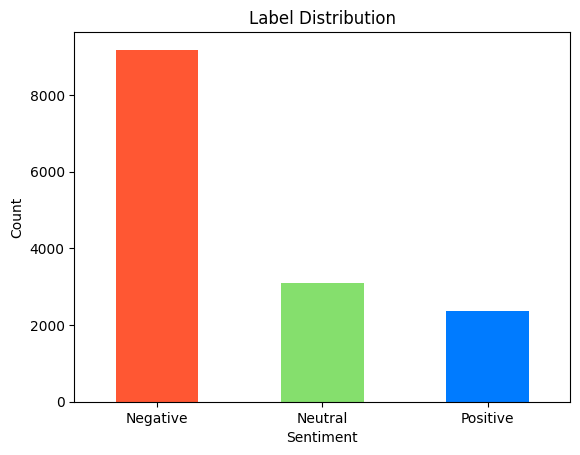

In [71]:
# Encode sentiments
label_mapping = {'negative': 0, 'neutral': 1, 'positive': 2}
df['label'] = df['airline_sentiment'].map(label_mapping)

# Display label distribution with custom colors
colors = ['#FF5733', '#85df6d', '#007BFF']  # Example colors: red, light green, and blue

df['label'].value_counts().sort_index().plot(kind='bar', color=colors)
plt.title('Label Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2], labels=['Negative', 'Neutral', 'Positive'], rotation=0)
plt.show()

<a id="lb"></a>
# <div style="background-color: #85df6d; font-family: 'Times New Roman', serif; font-size: 36px; color: #ffffff; text-align: center; border-radius: 15px; padding: 15px; border: 2px solid #ffffff; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.2);"><b>2. Splitting the Dataset</b></div>

We'll split the dataset into training and testing sets, ensuring a stratified split to maintain the distribution of classes.

In [72]:
# Define features and labels
X = df['clean_text']
y = df['label']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

Training set size: 11712
Testing set size: 2928


<a id="lb"></a>
# <div style="background-color: #85df6d; font-family: 'Times New Roman', serif; font-size: 36px; color: #ffffff; text-align: center; border-radius: 15px; padding: 15px; border: 2px solid #ffffff; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.2);"><b>3. Tokenization</b></div>

BERT requires inputs to be tokenized in a specific way. We'll use the BertTokenizer for this purpose.

In [73]:
from transformers import BertTokenizer

# Initialize the tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize the data
def tokenize_function(texts):
    return tokenizer(
        texts.tolist(),
        padding=True,
        truncation=True,
        max_length=128
    )

# Tokenize training and testing data
train_encodings = tokenize_function(X_train)
test_encodings = tokenize_function(X_test)

<a id="lb"></a>
# <div style="background-color: #85df6d; font-family: 'Times New Roman', serif; font-size: 36px; color: #ffffff; text-align: center; border-radius: 15px; padding: 15px; border: 2px solid #ffffff; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.2);"><b>4. Creating Dataset Objects</b></div>

We'll create a custom dataset class to feed data into the BERT model.

In [74]:
import torch
from torch.utils.data import Dataset

class TweetsDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels
    
    def __len__(self):
        return len(self.labels)
    
    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

# Create dataset objects
train_dataset = TweetsDataset(train_encodings, y_train.tolist())
test_dataset = TweetsDataset(test_encodings, y_test.tolist())

<a id="lb"></a>

# <div style="background-color: #85df6d; font-family: 'Times New Roman', serif; font-size: 36px; color: #ffffff; text-align: center; border-radius: 15px; padding: 15px; border: 2px solid #ffffff; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.2);"><b>5. Fine-Tuning BERT</b></div>

We'll fine-tune the pre-trained BERT model on our sentiment analysis task.

In [75]:
from transformers import BertForSequenceClassification, Trainer, TrainingArguments

# Initialize the model
model = BertForSequenceClassification.from_pretrained(
    'bert-base-uncased',
    num_labels=3,  # Negative, Neutral, Positive
    output_attentions=False,
    output_hidden_states=False
)

# Define training arguments
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,              # Number of training epochs
    per_device_train_batch_size=16,  # Batch size for training
    per_device_eval_batch_size=64,   # Batch size for evaluation
    warmup_steps=500,                # Number of warmup steps for learning rate scheduler
    weight_decay=0.01,               # Strength of weight decay
    logging_dir='./logs',            # Directory for storing logs
    logging_steps=10,
    evaluation_strategy='epoch',
    save_strategy='epoch',
    load_best_model_at_end=True,
    metric_for_best_model='accuracy'
)

# Define a metric computation function
import numpy as np
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def compute_metrics(pred):
    labels = pred.label_ids
    preds = np.argmax(pred.predictions, axis=1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='weighted')
    acc = accuracy_score(labels, preds)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

# Initialize the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics
)

A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Pl

<a id="lb"></a>

# <div style="background-color: #85df6d; font-family: 'Times New Roman', serif; font-size: 36px; color: #ffffff; text-align: center; border-radius: 15px; padding: 15px; border: 2px solid #ffffff; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.2);"><b>6. Training the Model</b></div>

In [76]:
# Train the model
trainer.train()

TrainOutput(global_step=2196, training_loss=0.368235384831663, metrics={'train_runtime': 229.7081, 'train_samples_per_second': 152.959, 'train_steps_per_second': 9.56, 'total_flos': 722246331663360.0, 'train_loss': 0.368235384831663, 'epoch': 3.0})

<a id="lb"></a>

# <div style="background-color: #85df6d; font-family: 'Times New Roman', serif; font-size: 36px; color: #ffffff; text-align: center; border-radius: 15px; padding: 15px; border: 2px solid #ffffff; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.2);"><b>7. Evaluating the Model</b></div>

In [77]:
# Evaluate the model
trainer.evaluate()

{'eval_loss': 0.6231580376625061,
 'eval_accuracy': 0.8418715846994536,
 'eval_f1': 0.8404927310228067,
 'eval_precision': 0.8396397983814451,
 'eval_recall': 0.8418715846994536,
 'eval_runtime': 3.603,
 'eval_samples_per_second': 812.653,
 'eval_steps_per_second': 12.767,
 'epoch': 3.0}

<a id="lb"></a>
# <div style="background-color: #85df6d; font-family: 'Times New Roman', serif; font-size: 36px; color: #ffffff; text-align: center; border-radius: 15px; padding: 15px; border: 2px solid #ffffff; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.2);"><b>Model Evaluation</b></div>

After training, we'll evaluate the model's performance on the test set using various metrics

Classification Report:
              precision    recall  f1-score   support

    Negative       0.89      0.92      0.91      1835
     Neutral       0.71      0.69      0.70       620
    Positive       0.80      0.75      0.77       473

    accuracy                           0.84      2928
   macro avg       0.80      0.78      0.79      2928
weighted avg       0.84      0.84      0.84      2928



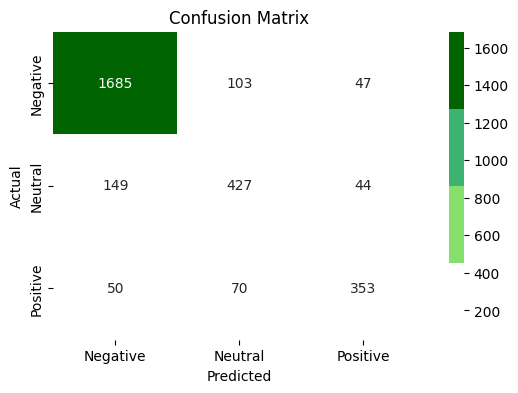

Accuracy: 84.19%


In [78]:
import matplotlib.colors as mcolors

# Predictions
predictions, true_labels, _ = trainer.predict(test_dataset)
preds = np.argmax(predictions, axis=1)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, preds, target_names=['Negative', 'Neutral', 'Positive']))

# Confusion Matrix
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(6, 4))

# Create a custom colormap
cmap = mcolors.ListedColormap(['#ffffff', '#85df6d', '#3cb371', '#006400'])  # White to light green to dark green

sns.heatmap(cm, annot=True, fmt='d', cmap=cmap,
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Accuracy
accuracy = accuracy_score(y_test, preds)
print(f"Accuracy: {accuracy * 100:.2f}%")

<a id="lb"></a>

# <div style="background-color: #85df6d; font-family: 'Times New Roman', serif; font-size: 36px; color: #ffffff; text-align: center; border-radius: 15px; padding: 15px; border: 2px solid #ffffff; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.2);"><b>Explainable AI with LIME</b></div>

Explainable AI helps in understanding how the model makes its predictions. I had use LIME (Local Interpretable Model-agnostic Explanations) to interpret the predictions of our BERT-based model by highlighting the most influential words in the input text.
<a id="lb"></a>

# <div style="background-color: #85df6d; font-family: 'Times New Roman', serif; font-size: 36px; color: #ffffff; text-align: center; border-radius: 15px; padding: 15px; border: 2px solid #ffffff; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.2);"><b>1. Installing and Importing LIME</b></div>

In [79]:
# Explainable AI Libraries
#!pip install lime
#from lime.lime_text import LimeTextExplainer

<a id="lb"></a>

# <div style="background-color: #85df6d; font-family: 'Times New Roman', serif; font-size: 36px; color: #ffffff; text-align: center; border-radius: 15px; padding: 15px; border: 2px solid #ffffff; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.2);"><b>2. Preparing the Explainer</b></div>

We'll set up a LIME explainer for text data.

In [80]:
from lime.lime_text import LimeTextExplainer

# Define class names
class_names = ['Negative', 'Neutral', 'Positive']

# Initialize LIME explainer
explainer = LimeTextExplainer(class_names=class_names)

<a id="lb"></a>

# <div style="background-color: #85df6d; font-family: 'Times New Roman', serif; font-size: 36px; color: #ffffff; text-align: center; border-radius: 15px; padding: 15px; border: 2px solid #ffffff; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.2);"><b>3. Defining a Prediction Function</b></div>

LIME requires a prediction function that takes raw text and returns probability distributions over classes.

In [81]:
def predict_proba(texts):
    # Tokenize the texts
    encodings = tokenizer(
        texts,
        padding=True,
        truncation=True,
        max_length=128,
        return_tensors='pt'
    )
    # Move tensors to the same device as the model
    encodings = {key: val.to(model.device) for key, val in encodings.items()}
    
    # Get logits from the model
    with torch.no_grad():
        outputs = model(**encodings)
        logits = outputs.logits
        probs = torch.softmax(logits, dim=1).cpu().numpy()
    return probs

<a id="lb"></a>

# <div style="background-color: #85df6d; font-family: 'Times New Roman', serif; font-size: 36px; color: #ffffff; text-align: center; border-radius: 15px; padding: 15px; border: 2px solid #ffffff; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.2);"><b>4. Explaining a Single Predictions</b></div>

Let's choose a sample tweet and explain its prediction.

In [85]:
# Select a sample from the test set
sample_idx = 42  # You can change this index to explore different samples
sample_text = X_test.iloc[sample_idx]
actual_sentiment = y_test.iloc[sample_idx]
predicted_sentiment = preds[sample_idx]

print(f"Original Tweet: {df.iloc[X_test.index[sample_idx]]['text']}")
print(f"Cleaned Tweet: {sample_text}")
print(f"Actual Sentiment: {class_names[actual_sentiment]}")
print(f"Predicted Sentiment: {class_names[predicted_sentiment]}")

# Generate explanation
exp = explainer.explain_instance(
    sample_text,
    predict_proba,
    num_features=10,
    labels=[predicted_sentiment]
)

# Display the explanation
exp.show_in_notebook(text=True)

Original Tweet: @JetBlue Do you have any flights with lie flat seating from STL to PDX on or around the date of March 5?
Cleaned Tweet: do you have any flights with lie flat seating from stl to pdx on or around the date of march
Actual Sentiment: Neutral
Predicted Sentiment: Neutral


<a id="lb"></a>

# <div style="background-color: #85df6d; font-family: 'Times New Roman', serif; font-size: 36px; color: #ffffff; text-align: center; border-radius: 15px; padding: 15px; border: 2px solid #ffffff; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.2);"><b>5. Explaining Multiple Predictions</b></div>

We can also visualize explanations for multiple samples to gain broader insights.

In [84]:
# Function to display explanations for multiple samples
def display_lime_explanations(texts, labels, preds, num_samples=3):
    for i in range(num_samples):
        idx = np.random.randint(0, len(texts))
        text = texts.iloc[idx]
        actual = labels.iloc[idx]
        pred = preds[idx]
        print(f"\nSample {i+1}")
        print(f"Original Tweet: {df.iloc[X_test.index[idx]]['text']}")
        print(f"Cleaned Tweet: {text}")
        print(f"Actual Sentiment: {class_names[actual]}")
        print(f"Predicted Sentiment: {class_names[pred]}")
        exp = explainer.explain_instance(
            text,
            predict_proba,
            num_features=10,
            labels=[pred]
        )
        exp.show_in_notebook(text=True)

# Display explanations for 3 random samples
display_lime_explanations(X_test, y_test, preds, num_samples=3)


Sample 1
Original Tweet: @united JP - DM message who? Can't get a DM through to @united
Cleaned Tweet: jp dm message who can get dm through to
Actual Sentiment: Negative
Predicted Sentiment: Neutral



Sample 2
Original Tweet: @SouthwestAir just had a great flight #4223 with Damion! He was the best #damionflight4223
Cleaned Tweet: just had great flight with damion he was the best damionflight
Actual Sentiment: Positive
Predicted Sentiment: Positive



Sample 3
Original Tweet: @united you're good. Thank you!
Cleaned Tweet: you re good thank you
Actual Sentiment: Positive
Predicted Sentiment: Positive


<a id="lb"></a>

# <div style="background-color: #85df6d; font-family: 'Times New Roman', serif; font-size: 36px; color: #ffffff; text-align: center; border-radius: 15px; padding: 15px; border: 2px solid #ffffff; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.2);"><b>Conclusion</b></div>

In this notebook, I leveraged a BERT-based transformer model to perform sentiment analysis on social media posts, specifically tweets. BERT's deep bidirectional understanding enabled the model to achieve high accuracy in classifying sentiments as negative, neutral, or positive. Additionally, by integrating LIME, I provided explanations for individual predictions, highlighting the most influential words or phrases that drove the model's decisions. This combination of advanced modeling and explainability ensures both high performance and transparency, which are crucial for organizations to understand public perception and make informed decisions based on sentiment analysis.